In [1]:
!pip install torchsummary
!pip install torchvision
!pip install albumentations==0.4.5


     |████████████████████████████████| 122kB 5.0MB/s 
     |████████████████████████████████| 634kB 18.0MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64378 sha256=6d2e8461d2042cd3ac974623faa8f86583ace2cf361b825e282091de5cb59c7c
  Stored in directory: /root/.cache/pip/wheels/f0/a0/61/e50f93165a5ec7e7f5d65064e513239505bc4c06d2289557d3
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=a0b39ae68866d581650fdcd7c127f8d7b89533ac02f59c64f0b55d72e966b3e0
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [0]:
from torchsummary import summary
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import torch.nn.functional as F
from albumentations.pytorch.transforms import ToTensor

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
sys.path.append('/content/drive/My Drive/EVA4/s8')
!ls '/content/drive/My Drive/EVA4/s8'
import albumentation_data


albumentation_data.py  GradCam.py   __pycache__       Session9_Quiz.ipynb
cnn_model.py	       __init__.py  QuizDNN.py	      train_test.py
data_loader.py	       main.py	    resnet18_arch.py  utils.py


In [5]:
# Created folder EVA4 and s8 in EVA4. Upload the py files in to s8 
import sys
sys.path.append('/content/drive/My Drive/EVA4/s10')
!ls '/content/drive/My Drive/EVA4/s10'
import resnet18_arch
import data_loader
import GradCam
from lr_finder import LRFinder
from lrfinder_utils import LRUtils
from train_test import Trainer
#import albumentation_data

albumentation_data.py  GradCam.py	  __pycache__
cnn_model.py	       lr_finder.py	  resnet18_arch.py
data_loader.py	       lrfinder_utils.py  train_test.py


  pip install torch-lr-finder -v --global-option="amp"


<h3> Load Train & Test Data

In [6]:
train_loader, test_loader = albumentation_data.LoadData().load_data()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


<h2>Load ResNet 18 Model </h2>
<h3> Updated the Model to Return log_softmax </h3>

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = resnet18_arch.ResNet18().to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14           [-1, 64,

#LR Finder

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


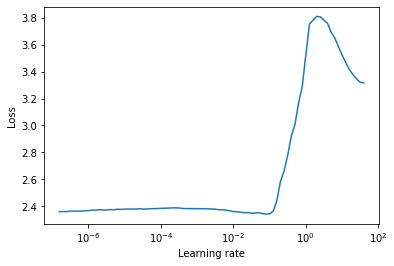

In [8]:
lr_finder = LRUtils.find_lr(model, device, train_loader, 1e-8, 1e-2)

In [9]:
loss = lr_finder.history['loss']
print(loss)
lr = lr_finder.history['lr']
print(loss.index(min(loss)), lr[loss.index(min(loss))])

[2.337339162826538, 2.3401179790496824, 2.345671973228454, 2.348811155080795, 2.348243265593051, 2.348957351626753, 2.3503700745033314, 2.3552804886629914, 2.3579007282221514, 2.359115715786416, 2.359596802956232, 2.3606129273355503, 2.3600251511088484, 2.36427623863855, 2.3640492249930602, 2.363394657267577, 2.3636278823204577, 2.3658050506739174, 2.3675441403147515, 2.3706535971173732, 2.3714473060974117, 2.3739707292713925, 2.3719180534798197, 2.372421028712628, 2.375414624188618, 2.3735846178288877, 2.3778237543233076, 2.376301622355128, 2.378352196182745, 2.3789704616940424, 2.3790066378586077, 2.3783013473360692, 2.381515195756009, 2.378885776052284, 2.3789015340178583, 2.381607391536326, 2.382041701868262, 2.382703789805702, 2.384830864567126, 2.384573269569513, 2.3859971863522675, 2.3875006116797346, 2.387779461691909, 2.386947143060591, 2.3835772281721184, 2.3823920315050287, 2.3823265447483504, 2.3823044343345106, 2.3820554416750968, 2.381228407353793, 2.381827555223408, 2.38

In [12]:
EPOCHS=50
criterion = nn.CrossEntropyLoss()
trainer = Trainer()
model = resnet18_arch.ResNet18().to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
optimizer = optim.SGD(model.parameters(), lr=lr[loss.index(min(loss))], momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, min_lr=1e-7, patience = 2) #(optimizer, mode='min', factor=0.5, patience=5, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08) #(optimizer, min_lr=1e-7, patience = 2) #
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, 'LR:', optimizer.param_groups[0]['lr'])
    trainer.train(model, device, train_loader, optimizer,criterion)
    trainer.test(model, device, test_loader)
    scheduler.step(trainer.test_losses[epoch])


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.07943282347242805


Loss=1.7775996923446655 Batch_id=390 Accuracy=28.13: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.7167, Accuracy: 3676/10000 (36.76%)

EPOCH: 2 LR: 0.07943282347242805


Loss=1.8565648794174194 Batch_id=390 Accuracy=37.17: 100%|██████████| 391/391 [03:22<00:00,  1.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.4653, Accuracy: 4637/10000 (46.37%)

EPOCH: 3 LR: 0.07943282347242805


Loss=1.4592746496200562 Batch_id=390 Accuracy=42.02: 100%|██████████| 391/391 [03:25<00:00,  1.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3313, Accuracy: 5234/10000 (52.34%)

EPOCH: 4 LR: 0.07943282347242805


Loss=1.36091947555542 Batch_id=390 Accuracy=46.21: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2611, Accuracy: 5507/10000 (55.07%)

EPOCH: 5 LR: 0.07943282347242805


Loss=1.4701173305511475 Batch_id=390 Accuracy=50.46: 100%|██████████| 391/391 [03:23<00:00,  1.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1943, Accuracy: 5739/10000 (57.39%)

EPOCH: 6 LR: 0.07943282347242805


Loss=1.2756373882293701 Batch_id=390 Accuracy=54.05: 100%|██████████| 391/391 [03:20<00:00,  1.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0253, Accuracy: 6392/10000 (63.92%)

EPOCH: 7 LR: 0.07943282347242805


Loss=1.4480358362197876 Batch_id=390 Accuracy=56.86: 100%|██████████| 391/391 [03:25<00:00,  1.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0487, Accuracy: 6339/10000 (63.39%)

EPOCH: 8 LR: 0.07943282347242805


Loss=1.0597115755081177 Batch_id=390 Accuracy=59.08: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9109, Accuracy: 6824/10000 (68.24%)

EPOCH: 9 LR: 0.07943282347242805


Loss=1.2278847694396973 Batch_id=390 Accuracy=61.78: 100%|██████████| 391/391 [03:25<00:00,  1.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7992, Accuracy: 7169/10000 (71.69%)

EPOCH: 10 LR: 0.07943282347242805


Loss=1.1583411693572998 Batch_id=390 Accuracy=62.92: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8537, Accuracy: 7070/10000 (70.70%)

EPOCH: 11 LR: 0.07943282347242805


Loss=1.2178056240081787 Batch_id=390 Accuracy=64.97: 100%|██████████| 391/391 [03:20<00:00,  1.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7327, Accuracy: 7446/10000 (74.46%)

EPOCH: 12 LR: 0.07943282347242805


Loss=1.263482689857483 Batch_id=390 Accuracy=66.26: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7483, Accuracy: 7486/10000 (74.86%)

EPOCH: 13 LR: 0.07943282347242805


Loss=0.8885226249694824 Batch_id=390 Accuracy=67.20: 100%|██████████| 391/391 [03:25<00:00,  1.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6876, Accuracy: 7644/10000 (76.44%)

EPOCH: 14 LR: 0.07943282347242805


Loss=0.8150927424430847 Batch_id=390 Accuracy=68.72: 100%|██████████| 391/391 [03:20<00:00,  1.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7759, Accuracy: 7416/10000 (74.16%)

EPOCH: 15 LR: 0.07943282347242805


Loss=0.6707949638366699 Batch_id=390 Accuracy=69.38: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6070, Accuracy: 7882/10000 (78.82%)

EPOCH: 16 LR: 0.07943282347242805


Loss=0.7652963995933533 Batch_id=390 Accuracy=70.57: 100%|██████████| 391/391 [03:24<00:00,  1.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6634, Accuracy: 7712/10000 (77.12%)

EPOCH: 17 LR: 0.07943282347242805


Loss=1.0021923780441284 Batch_id=390 Accuracy=71.20: 100%|██████████| 391/391 [03:22<00:00,  1.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6139, Accuracy: 7865/10000 (78.65%)

EPOCH: 18 LR: 0.07943282347242805


Loss=0.7569862604141235 Batch_id=390 Accuracy=71.96: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5504, Accuracy: 8133/10000 (81.33%)

EPOCH: 19 LR: 0.07943282347242805


Loss=0.870280385017395 Batch_id=390 Accuracy=72.76: 100%|██████████| 391/391 [03:24<00:00,  1.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6235, Accuracy: 7843/10000 (78.43%)

EPOCH: 20 LR: 0.07943282347242805


Loss=0.6033732891082764 Batch_id=390 Accuracy=73.49: 100%|██████████| 391/391 [03:22<00:00,  1.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5782, Accuracy: 7976/10000 (79.76%)

EPOCH: 21 LR: 0.07943282347242805


Loss=0.6349641680717468 Batch_id=390 Accuracy=73.72: 100%|██████████| 391/391 [03:22<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5133, Accuracy: 8262/10000 (82.62%)

EPOCH: 22 LR: 0.07943282347242805


Loss=0.6117372512817383 Batch_id=390 Accuracy=74.54: 100%|██████████| 391/391 [03:24<00:00,  1.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5255, Accuracy: 8173/10000 (81.73%)

EPOCH: 23 LR: 0.07943282347242805


Loss=0.8406658172607422 Batch_id=390 Accuracy=74.97: 100%|██████████| 391/391 [03:25<00:00,  1.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5056, Accuracy: 8293/10000 (82.93%)

EPOCH: 24 LR: 0.07943282347242805


Loss=0.758549690246582 Batch_id=390 Accuracy=75.42: 100%|██████████| 391/391 [03:25<00:00,  1.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4797, Accuracy: 8372/10000 (83.72%)

EPOCH: 25 LR: 0.07943282347242805


Loss=0.925306499004364 Batch_id=390 Accuracy=76.08: 100%|██████████| 391/391 [03:26<00:00,  1.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4565, Accuracy: 8429/10000 (84.29%)

EPOCH: 26 LR: 0.07943282347242805


Loss=0.9068464040756226 Batch_id=390 Accuracy=76.50: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4792, Accuracy: 8374/10000 (83.74%)

EPOCH: 27 LR: 0.07943282347242805


Loss=0.7894002199172974 Batch_id=390 Accuracy=76.95: 100%|██████████| 391/391 [03:22<00:00,  1.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4780, Accuracy: 8379/10000 (83.79%)

EPOCH: 28 LR: 0.07943282347242805


Loss=0.6530158519744873 Batch_id=390 Accuracy=76.99: 100%|██████████| 391/391 [03:22<00:00,  1.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4921, Accuracy: 8317/10000 (83.17%)

EPOCH: 29 LR: 0.007943282347242805


Loss=0.39462360739707947 Batch_id=390 Accuracy=80.71: 100%|██████████| 391/391 [03:23<00:00,  1.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3607, Accuracy: 8746/10000 (87.46%)

EPOCH: 30 LR: 0.007943282347242805


Loss=0.552619218826294 Batch_id=390 Accuracy=82.07: 100%|██████████| 391/391 [03:23<00:00,  1.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3470, Accuracy: 8821/10000 (88.21%)

EPOCH: 31 LR: 0.007943282347242805


Loss=0.4897495210170746 Batch_id=390 Accuracy=82.44: 100%|██████████| 391/391 [03:22<00:00,  1.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3384, Accuracy: 8827/10000 (88.27%)

EPOCH: 32 LR: 0.007943282347242805


Loss=0.5530997514724731 Batch_id=390 Accuracy=82.77: 100%|██████████| 391/391 [03:22<00:00,  1.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3355, Accuracy: 8838/10000 (88.38%)

EPOCH: 33 LR: 0.007943282347242805


Loss=0.33708852529525757 Batch_id=390 Accuracy=83.19: 100%|██████████| 391/391 [03:26<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3316, Accuracy: 8867/10000 (88.67%)

EPOCH: 34 LR: 0.007943282347242805


Loss=0.5202832818031311 Batch_id=390 Accuracy=83.54: 100%|██████████| 391/391 [03:25<00:00,  1.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3312, Accuracy: 8849/10000 (88.49%)

EPOCH: 35 LR: 0.007943282347242805


Loss=0.5852594971656799 Batch_id=390 Accuracy=83.91: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3273, Accuracy: 8883/10000 (88.83%)

EPOCH: 36 LR: 0.007943282347242805


Loss=0.37496140599250793 Batch_id=390 Accuracy=84.02: 100%|██████████| 391/391 [03:23<00:00,  1.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3226, Accuracy: 8885/10000 (88.85%)

EPOCH: 37 LR: 0.007943282347242805


Loss=0.2698315680027008 Batch_id=390 Accuracy=84.14: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3197, Accuracy: 8941/10000 (89.41%)

EPOCH: 38 LR: 0.007943282347242805


Loss=0.5335292220115662 Batch_id=390 Accuracy=84.36: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3242, Accuracy: 8903/10000 (89.03%)

EPOCH: 39 LR: 0.007943282347242805


Loss=0.4582798480987549 Batch_id=390 Accuracy=84.52: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3153, Accuracy: 8923/10000 (89.23%)

EPOCH: 40 LR: 0.007943282347242805


Loss=0.5425503253936768 Batch_id=390 Accuracy=84.55: 100%|██████████| 391/391 [03:22<00:00,  1.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3145, Accuracy: 8931/10000 (89.31%)

EPOCH: 41 LR: 0.007943282347242805


Loss=0.4729664921760559 Batch_id=390 Accuracy=84.86: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3139, Accuracy: 8928/10000 (89.28%)

EPOCH: 42 LR: 0.007943282347242805


Loss=0.3067724108695984 Batch_id=390 Accuracy=85.03: 100%|██████████| 391/391 [03:25<00:00,  1.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3146, Accuracy: 8932/10000 (89.32%)

EPOCH: 43 LR: 0.007943282347242805


Loss=0.3916681408882141 Batch_id=390 Accuracy=85.27: 100%|██████████| 391/391 [03:20<00:00,  1.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3117, Accuracy: 8934/10000 (89.34%)

EPOCH: 44 LR: 0.007943282347242805


Loss=0.4781540036201477 Batch_id=390 Accuracy=85.21: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3100, Accuracy: 8967/10000 (89.67%)

EPOCH: 45 LR: 0.007943282347242805


Loss=0.37085410952568054 Batch_id=390 Accuracy=85.43: 100%|██████████| 391/391 [03:25<00:00,  1.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3100, Accuracy: 8954/10000 (89.54%)

EPOCH: 46 LR: 0.007943282347242805


Loss=0.5132731795310974 Batch_id=390 Accuracy=85.55: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3090, Accuracy: 8948/10000 (89.48%)

EPOCH: 47 LR: 0.007943282347242805


Loss=0.3450827896595001 Batch_id=390 Accuracy=85.78: 100%|██████████| 391/391 [03:18<00:00,  1.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3116, Accuracy: 8938/10000 (89.38%)

EPOCH: 48 LR: 0.007943282347242805


Loss=0.27575719356536865 Batch_id=390 Accuracy=85.64: 100%|██████████| 391/391 [03:21<00:00,  1.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3058, Accuracy: 8949/10000 (89.49%)

EPOCH: 49 LR: 0.007943282347242805


Loss=0.4688282907009125 Batch_id=390 Accuracy=86.03: 100%|██████████| 391/391 [03:23<00:00,  1.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3093, Accuracy: 8952/10000 (89.52%)

EPOCH: 50 LR: 0.007943282347242805


Loss=0.6204019784927368 Batch_id=390 Accuracy=86.00: 100%|██████████| 391/391 [03:25<00:00,  1.90it/s]



Test set: Average loss: 0.3107, Accuracy: 8971/10000 (89.71%)



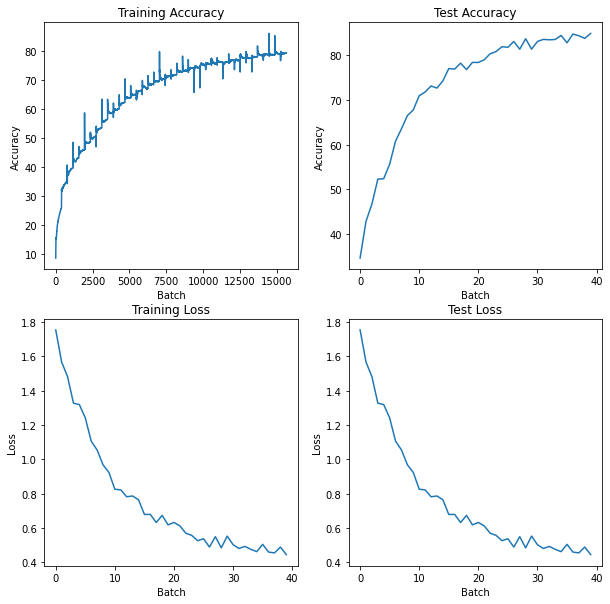

In [12]:
LRUtils.plot_lrfinder(trainer.train_acc, trainer.test_acc, trainer.test_losses, trainer.test_losses)


In [0]:
from torch.autograd import Variable
model.eval()
correct = 0
total = 0
incorrect_examples=[]
incorrect_prediction=[]
actual_result=[]
result = []
for (i, [images, labels]) in enumerate(test_loader):
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)                    
    correct += (predicted == labels).sum() 
    if (predicted != labels).sum() > 0:
      idxs_mask = (predicted == labels).view(-1)
      incorrect_examples.append(images[idxs_mask==False].squeeze(1).cpu().numpy()) 
      incorrect_prediction.append(predicted[idxs_mask==False])
      actual_result.append(labels[idxs_mask==False])

<H1>GRAD CAM</H1>

In [0]:
import urllib
import numpy as np
from google.colab.patches import cv2_imshow
import albumentations as A
import albumentations.pytorch as AP
import cv2

def getimage(img, transform, input_size=(32,32)):
  if img.startswith("http"):
      req = urllib.request.urlopen(img)
      arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
      img = cv2.imdecode(arr, -1) # 'Load it as it is'
  else:
    img = cv2.imread(img, 1)
  img = img[:,:, -1::-1]
  img = np.uint8(cv2.resize(img, input_size))
  return transform(img)

def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  for i in range(img.shape[0]):
    img[i] = (img[i]*0.5)+0.5
  return np.transpose(img, (1,2,0))

torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


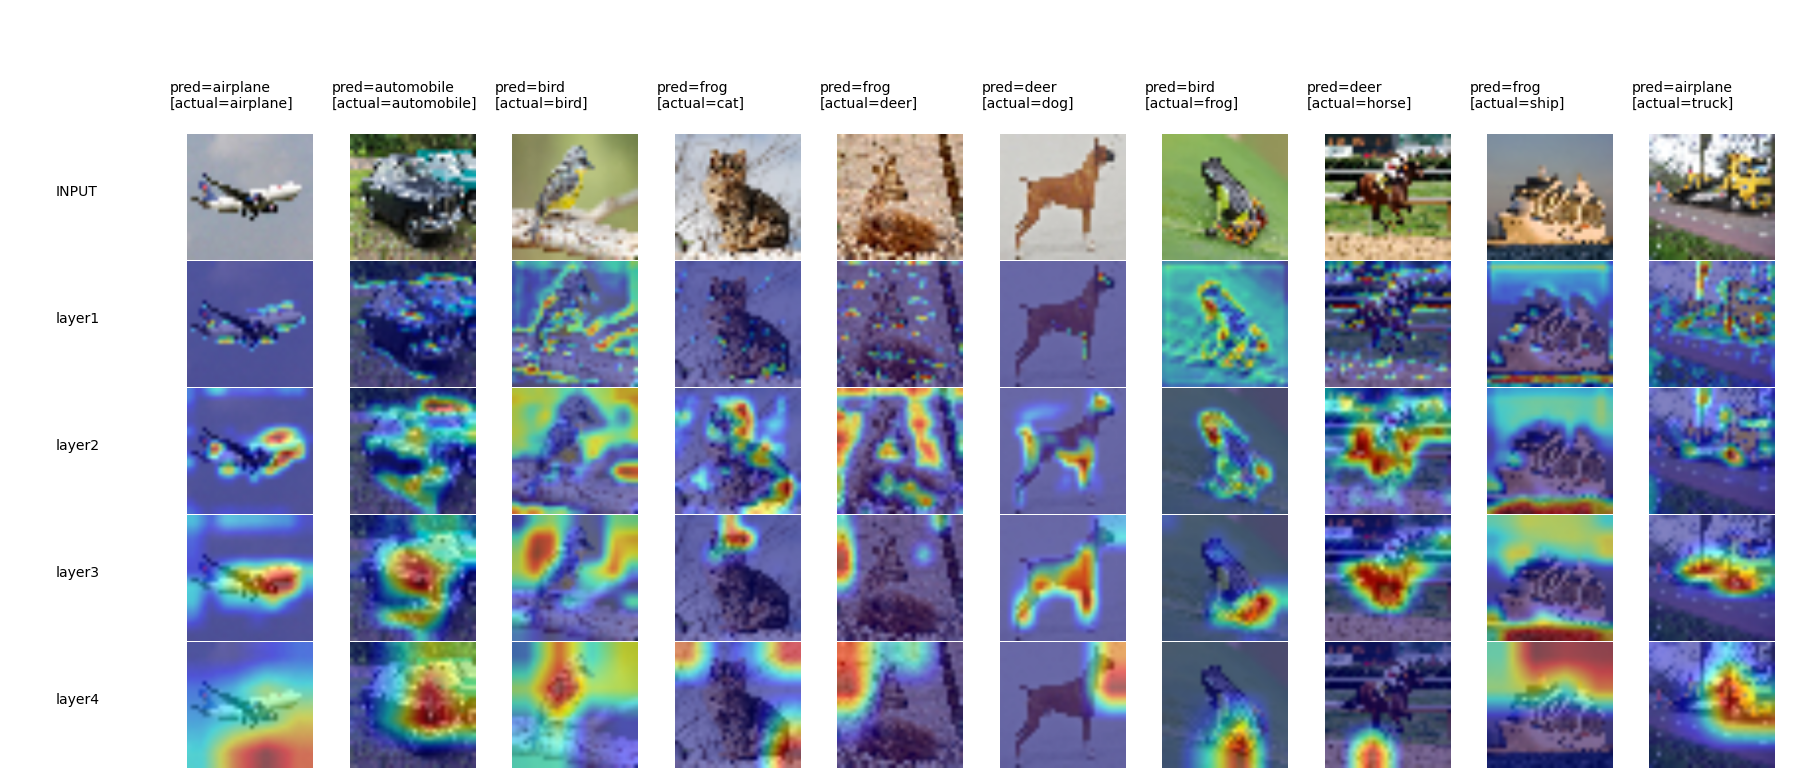

In [0]:
from GradCam import GRADCAM, PLOT
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
target_layers = ["layer1", "layer2", "layer3", "layer4"]
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
gradcam_output, probs, predicted_classes = GRADCAM(images, target_classes, model, target_layers)
PLOT(gradcam_output, images, target_classes, target_layers, classes, (3, 32, 32), predicted_classes, unnormalize)